In [1]:
import sys
sys.path.append('..')

In [2]:
import cv2
import matplotlib.pyplot as plt

from src import ImageAnnotator, ImagePostProcessor, AnnotationFilter, GPTLabelCreator
from src import local_image_to_data_url, numpy_image_to_data_url

(1024, 1024, 3)


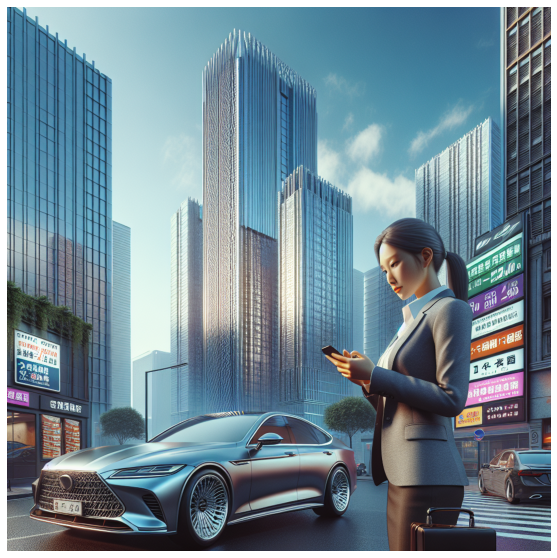

In [3]:
file_path = "../data/sample.png"

image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
image_annotator = ImageAnnotator()
anns = image_annotator.annotate(image)

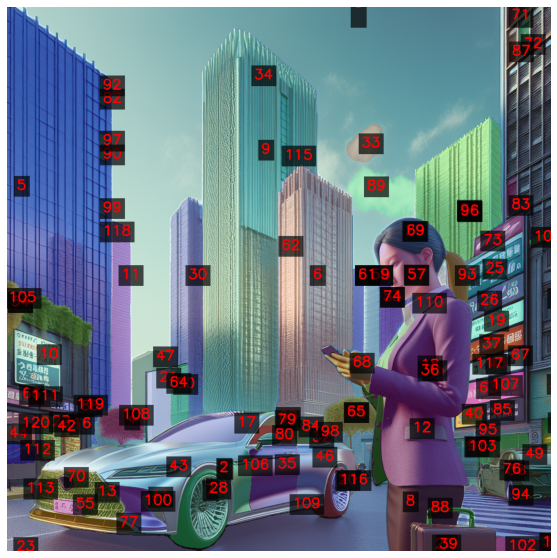

In [5]:
post_processor = ImagePostProcessor(image=image, anns=anns)
annotated_image = post_processor.get_anns_img(alpha=0.3, only_boundaries=False, boundary_thickness=6)

plt.figure(figsize=(10,10))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

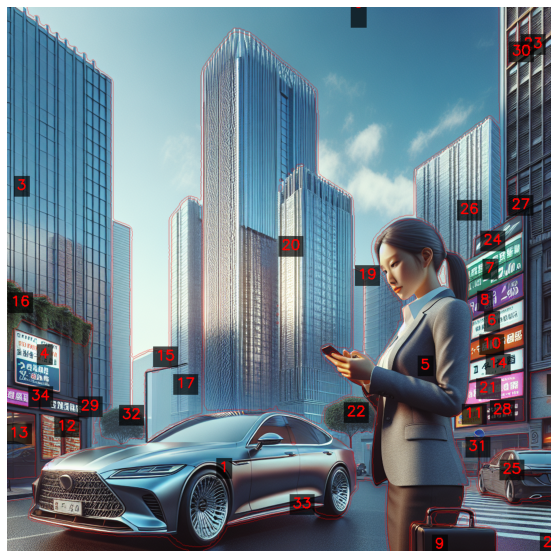

In [6]:
annotation_filter = AnnotationFilter()
new_anns = annotation_filter.filter_by_overlap_ratio(anns, 0.90)
new_anns = annotation_filter.filter_by_area_ratio(new_anns, 0.001)
new_post_processor = ImagePostProcessor(image=image, anns=new_anns)

annotated_image = new_post_processor.get_anns_img(alpha=0.3, color=(255, 0, 0), only_boundaries=True, boundary_thickness=2)

plt.figure(figsize=(10,10))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

In [7]:
gpt_label_creator = GPTLabelCreator()

data_url = numpy_image_to_data_url(annotated_image)

results = gpt_label_creator.create_label_w_annotated_image(
    data_url=data_url,
    label_suggestions=[
        "building",
        "car",
        "person",
        "signboard",
        "others",
    ],
    suggestions_w_remark=[
        "others",
    ]
)
results

[{'index': 1, 'label': 'car'},
 {'index': 2, 'label': 'signboard'},
 {'index': 3, 'label': 'building'},
 {'index': 4, 'label': 'signboard'},
 {'index': 5, 'label': 'person'},
 {'index': 6, 'label': 'signboard'},
 {'index': 7, 'label': 'signboard'},
 {'index': 8, 'label': 'signboard'},
 {'index': 9, 'label': 'signboard'},
 {'index': 10, 'label': 'signboard'},
 {'index': 11, 'label': 'signboard'},
 {'index': 12, 'label': 'signboard'},
 {'index': 13, 'label': 'signboard'},
 {'index': 14, 'label': 'signboard'},
 {'index': 15, 'label': 'building'},
 {'index': 16, 'label': 'building'},
 {'index': 17, 'label': 'building'},
 {'index': 18, 'label': 'signboard'},
 {'index': 19, 'label': 'building'},
 {'index': 20, 'label': 'building'},
 {'index': 21, 'label': 'signboard'},
 {'index': 22, 'label': 'others', 'remark': 'briefcase'},
 {'index': 23, 'label': 'signboard'},
 {'index': 24, 'label': 'signboard'},
 {'index': 25, 'label': 'car'},
 {'index': 26, 'label': 'signboard'},
 {'index': 27, 'label'

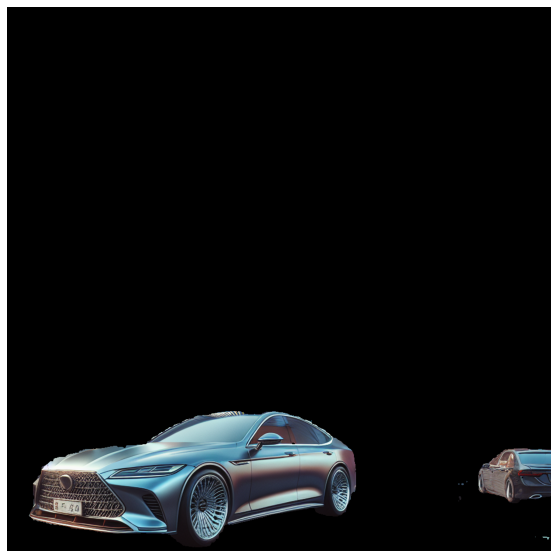

In [10]:
ex_anns = []
for result in results:
    if result['label'] not in ["car"]:
        continue
    idx = result['index']
    ex_anns.append(new_anns[idx])

ex_post_processor = ImagePostProcessor(image=image, anns=ex_anns)
cropped_image = ex_post_processor.crop_by_segmentations(padding=0)

plt.figure(figsize=(10,10))
plt.imshow(cropped_image)
plt.axis('off')
plt.show()